# Profitable App Profiles for the App Store and Google Play Markets

Add a title.
Write a short introduction where you explain (in no more than two paragraphs):
What the project is about.

* Our goal in this project is to find and explore app profile that are profitable for the App Store and Google Play markets. We're working as data nanlysts for a company  that builds Android and IOS mobile apps, and our job is to enable our team of developers to make data-driven decisions with respect to the kind of apps they build.

What your goal is in this project.
* At our company, we only build apps that are free to download and install, and our main source of revenue consists of in-app ads. Thid means our revenue for any give app is mostly influenced by the number of users who use our app - the more user that see and engage with the ads, the better. Our goal for this project is to analyze data to help our developers understand what type of apps are likely to attract more uses.

## Open and explore data sets
As of September 2018, there were approximately 2 million iOS apps available on the App Store, and 2.1 million Android apps on Google Play.
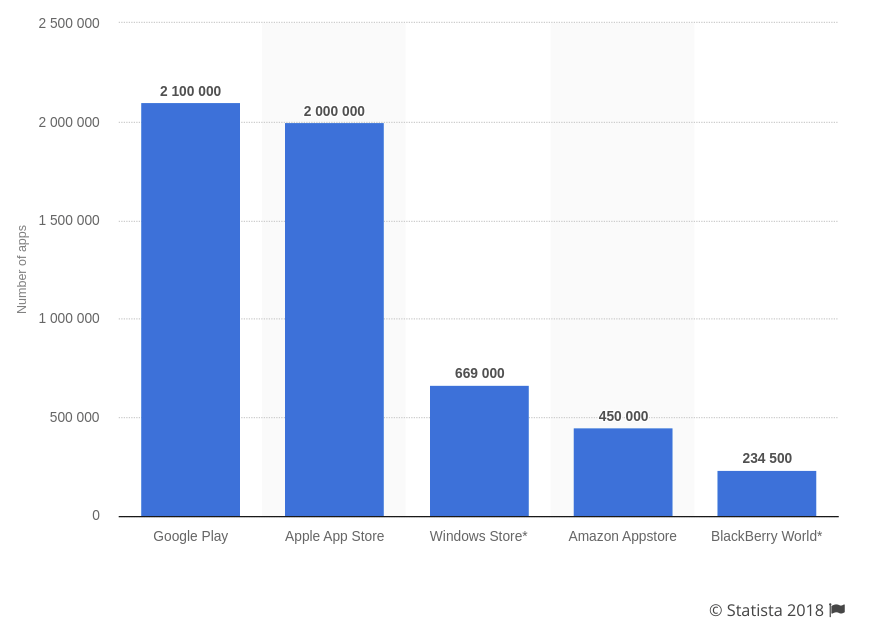

Collecting data for over 4 million apps requires a significant amount of time and money, so we'll try to analyze a samole of the data indtead. To avoid spending resources on collecting new data ourselves, we should first try to see if we can find any relevant existing data at no cost. Luckly, these are two data sets that seem suitable for our goals:

* [A data set](https://www.kaggle.com/lava18/google-play-store-apps) containing data about approximately 10,000 Android apps from Google Play; the data was collected in August 2018. You can download the data set from [this link](https://dq-content.s3.amazonaws.com/350/googleplaystore.csv).
* [A data set](https://www.kaggle.com/ramamet4/app-store-apple-data-set-10k-apps) containing data about approximately 7,000 IOS apps from the App Store; the data was collected in July 2017. You can download the data set directly from [this link](https://dq-content.s3.amazonaws.com/350/AppleStore.csv)

First of all, we'll start opening the two data sets and exploring the data

In [1]:
from csv import reader

#open AppStrore data set
opened_file = open('data_set/AppleStore.csv', encoding = 'utf8')
read_file = reader(opened_file)
apple = list(read_file)
apple_header = apple[0]
apple = apple[1:]

#open GooglePlayStore data set
opened_file = open('data_set/googleplaystore.csv', encoding='utf8')
read_file = reader(opened_file)
google = list(read_file)
google_header = google[0]
google = google[1:]

<br>

Function created for explore the rows and columns of the data set
* Print the header and a 3 rows for Apple and Google data set to explore the data
* Find the total number of rows and columns for apple data set


In [2]:
def explore_data(data_set,start,end):
    data_set_slice = data_set[start:end]
    for row in data_set_slice:
        print(row)
        print('\n')
    print('Number of rows: ', len(data_set)) 
    print('Number of columns: ', len(data_set[0]))    
    

In [3]:
print(apple_header)
print('\n')
explore_data(apple,0,3)

['id', 'track_name', 'size_bytes', 'currency', 'price', 'rating_count_tot', 'rating_count_ver', 'user_rating', 'user_rating_ver', 'ver', 'cont_rating', 'prime_genre', 'sup_devices.num', 'ipadSc_urls.num', 'lang.num', 'vpp_lic']


['284882215', 'Facebook', '389879808', 'USD', '0.0', '2974676', '212', '3.5', '3.5', '95.0', '4+', 'Social Networking', '37', '1', '29', '1']


['389801252', 'Instagram', '113954816', 'USD', '0.0', '2161558', '1289', '4.5', '4.0', '10.23', '12+', 'Photo & Video', '37', '0', '29', '1']


['529479190', 'Clash of Clans', '116476928', 'USD', '0.0', '2130805', '579', '4.5', '4.5', '9.24.12', '9+', 'Games', '38', '5', '18', '1']


Number of rows:  7197
Number of columns:  16


From the information displayed above, we can see there are 7197 apps in Apple data set, each of them should have 16 attributes. For the data set header, not all the colcumn names are easy to understand, but we can find more details about the column in the Apple apps data set [documentation](https://www.kaggle.com/ramamet4/app-store-apple-data-set-10k-apps)

In [4]:
print(google_header)
print('\n')
explore_data(google,0,3)

['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']


['Photo Editor & Candy Camera & Grid & ScrapBook', 'ART_AND_DESIGN', '4.1', '159', '19M', '10,000+', 'Free', '0', 'Everyone', 'Art & Design', 'January 7, 2018', '1.0.0', '4.0.3 and up']


['Coloring book moana', 'ART_AND_DESIGN', '3.9', '967', '14M', '500,000+', 'Free', '0', 'Everyone', 'Art & Design;Pretend Play', 'January 15, 2018', '2.0.0', '4.0.3 and up']


['U Launcher Lite – FREE Live Cool Themes, Hide Apps', 'ART_AND_DESIGN', '4.7', '87510', '8.7M', '5,000,000+', 'Free', '0', 'Everyone', 'Art & Design', 'August 1, 2018', '1.2.4', '4.0.3 and up']


Number of rows:  10841
Number of columns:  13


From above, Google data set has 10841 apps and 13 columns. The columns as displayed like 'App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver' are very informative and meaningful. 

# Google data set 
## In the next step, we are going to clean the data, that's include:
* Detect inaccurate data, and correct or remove it
* Detect duplicated data, and remove duplicates
* Remove non-English apps
* Remove apps that aren't free

## Detect inaccurate data, and correct or remove it

In [5]:
# If no result has been printed out, that means data length are match with the header length
for row in google:
    if len(row) != len(google_header):
        print(row)
        print('\n')
        print(google.index(row))

['Life Made WI-Fi Touchscreen Photo Frame', '1.9', '19', '3.0M', '1,000+', 'Free', '0', 'Everyone', '', 'February 11, 2018', '1.0.19', '4.0 and up']


10472


We detected in the row 10472 of Google data set is not match with the Google header and 1st row of the data set, we can print out with the header to see what caused the error.

In [6]:
print(google_header)  # The header, correct row
print('\n')
print(google[0])      # The first row, correct row
print('\n')
print(google[10472])  # Incorrect row

['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']


['Photo Editor & Candy Camera & Grid & ScrapBook', 'ART_AND_DESIGN', '4.1', '159', '19M', '10,000+', 'Free', '0', 'Everyone', 'Art & Design', 'January 7, 2018', '1.0.0', '4.0.3 and up']


['Life Made WI-Fi Touchscreen Photo Frame', '1.9', '19', '3.0M', '1,000+', 'Free', '0', 'Everyone', '', 'February 11, 2018', '1.0.19', '4.0 and up']


In [7]:
print(len(google_header))
print(len(google[10472]))

13
12



As we can see the app 'Life Made WI-FI Touchscreen Photo Frame', where the 2ed column is just numbers **1.9**, it should describe the 'Category' of this app. The 3rd column 'Rating': **19**, which is over the maximum rating **5** in Google Play app store.  Actually we can see the 'Category' data is missing in this app, so we have to delete this row

In [8]:
print(len(google))
del(google[10472])   #Make sure this part of code run ONCE ONLY !!!
print(len(google))

10841
10840


##  Detect duplicated data, and remove duplicates

In [9]:
unique_apps = []
duplicated_apps = []

for app in google:
    name = app[0]
    if name in unique_apps:
        duplicated_apps.append(name)
    else:
        unique_apps.append(name)

print(unique_apps[0:15])
print('\n')
print(duplicated_apps[0:15])
print('\n')
print('The number of unique Google apps is: ', len(unique_apps))
print('The number of duplicated Google apps is: ', len(duplicated_apps))


['Photo Editor & Candy Camera & Grid & ScrapBook', 'Coloring book moana', 'U Launcher Lite – FREE Live Cool Themes, Hide Apps', 'Sketch - Draw & Paint', 'Pixel Draw - Number Art Coloring Book', 'Paper flowers instructions', 'Smoke Effect Photo Maker - Smoke Editor', 'Infinite Painter', 'Garden Coloring Book', 'Kids Paint Free - Drawing Fun', 'Text on Photo - Fonteee', 'Name Art Photo Editor - Focus n Filters', 'Tattoo Name On My Photo Editor', 'Mandala Coloring Book', '3D Color Pixel by Number - Sandbox Art Coloring']


['Quick PDF Scanner + OCR FREE', 'Box', 'Google My Business', 'ZOOM Cloud Meetings', 'join.me - Simple Meetings', 'Box', 'Zenefits', 'Google Ads', 'Google My Business', 'Slack', 'FreshBooks Classic', 'Insightly CRM', 'QuickBooks Accounting: Invoicing & Expenses', 'HipChat - Chat Built for Teams', 'Xero Accounting Software']


The number of unique Google apps is:  9659
The number of duplicated Google apps is:  1181


We created 2 new list to seperate the names that has duplicate in the original Google app data set. One list contain unique app names and another list has duplicate app names, also printed out some sample names for each list as well as count the numbers of name in each list.

After running the code above, it is very obvious to see there are 1181 duplicated apps in the Google App store, and we can easily spot App name like 'Google My Business' 'Box' etc. are duplicated, we must delete all the duplicated apps and use the remaining unique 9659 apps to continue our data set analysis. 

To remove the duplicated apps, we should keep one of the most updated information to get more accurate analyze result, but select the most valuable information manually one by one is not realistic as there are thousands of duplicated rows, it will consume a lot of time and man power. 

Analyze the data set, we can find the review numbers can be used as our duplicate data selection critera, because the one has the highest number of reviews are the most updated data information.


In [10]:
review_max = {}  #Dictionary, the value is review number
for app in google:
    name = app[0]
    n_reviews = float(app[3])
    if name in review_max and review_max[name] < n_reviews:
        review_max[name] = n_reviews
    elif name not in review_max:
        review_max[name] = n_reviews

print('The length we expected: ', len(google) - 1181)
print('Actual length after removing duplicate data: ', len(review_max))

The length we expected:  9659
Actual length after removing duplicate data:  9659


In the following step we are going to create two new list, one is 'google_cleaned' which will store unique data, another is 'already_added' which is going to record app names has been added to the 'google_cleaned', in order to prevent different app name but they have same review numbers be added to the unique 'google_cleaned' list.

In [11]:
google_cleaned = []
already_added = []

for app in google:
    name = app[0]
    n_reviews = float(app[3])
    
       #review_max[name]: Dictionary, the Key is name, the value is review number
    if review_max[name] == n_reviews and name not in already_added:
        google_cleaned.append(app)
        already_added.append(name)



explore_data(google_cleaned, 0, 3)

['Photo Editor & Candy Camera & Grid & ScrapBook', 'ART_AND_DESIGN', '4.1', '159', '19M', '10,000+', 'Free', '0', 'Everyone', 'Art & Design', 'January 7, 2018', '1.0.0', '4.0.3 and up']


['U Launcher Lite – FREE Live Cool Themes, Hide Apps', 'ART_AND_DESIGN', '4.7', '87510', '8.7M', '5,000,000+', 'Free', '0', 'Everyone', 'Art & Design', 'August 1, 2018', '1.2.4', '4.0.3 and up']


['Sketch - Draw & Paint', 'ART_AND_DESIGN', '4.5', '215644', '25M', '50,000,000+', 'Free', '0', 'Teen', 'Art & Design', 'June 8, 2018', 'Varies with device', '4.2 and up']


Number of rows:  9659
Number of columns:  13


Now we have new data set (no duplicate data) name: google_cleaned, there are 9659 rows in it, just as expected

## Remove non-English apps

The following function will be used as a example of how we going to detect non-english apps.

In [12]:
def is_english(name):
    for character in name:
        if ord(character) > 127:
            return False
    return True


In [13]:
is_english('Instagram')

True

In [14]:
is_english('爱奇艺PPS -《欢乐颂2》电视剧热播')

False

In [15]:
is_english('Docs To Go™ Free Office Suite')


False

In [16]:
is_english('Instachat 😜')

False

The function is not bad, but there are some english apps may contain special characters in their name also has been marked as False. We need to figure out a way to minimize the impact on english app that has special character.
In the following re-defined function, we set the tolerance for up to 3 special characters in the app's name.  

In [17]:
def is_english(name):
    non_english = 0
    
    for character in name:
        if ord(character) > 127:
            non_english += 1
    
    if non_english <= 3:
        return True
    else:
        return False
    
print(is_english('Instachat 😜'))
print(ord('😜'))

print(is_english('Docs To Go™ Free Office Suite'))
print(ord('™'))

True
128540
True
8482


Now, less than 3 special characters in english app name will not be marked as False, it's not perfect, but for our analyze purpose, it is good enough. 

In the next step, we are going to use the **'google_cleaned'** list to continue optimize the data set  --  remove the non-english app. The new list name will be **'google_english'**

In [18]:
google_english = []
google_non_english = []

#apple_english = []
#apple_non_english = []

for app in google_cleaned:
    name = app[0]
    if is_english(name):
        google_english.append(app)
    else:
        google_non_english.append(app)


In [19]:
explore_data(google_english,0,3)

['Photo Editor & Candy Camera & Grid & ScrapBook', 'ART_AND_DESIGN', '4.1', '159', '19M', '10,000+', 'Free', '0', 'Everyone', 'Art & Design', 'January 7, 2018', '1.0.0', '4.0.3 and up']


['U Launcher Lite – FREE Live Cool Themes, Hide Apps', 'ART_AND_DESIGN', '4.7', '87510', '8.7M', '5,000,000+', 'Free', '0', 'Everyone', 'Art & Design', 'August 1, 2018', '1.2.4', '4.0.3 and up']


['Sketch - Draw & Paint', 'ART_AND_DESIGN', '4.5', '215644', '25M', '50,000,000+', 'Free', '0', 'Teen', 'Art & Design', 'June 8, 2018', 'Varies with device', '4.2 and up']


Number of rows:  9614
Number of columns:  13


In [20]:
explore_data(google_non_english,0,3)

['Flame - درب عقلك يوميا', 'EDUCATION', '4.6', '56065', '37M', '1,000,000+', 'Free', '0', 'Everyone', 'Education', 'July 26, 2018', '3.3', '4.1 and up']


['သိင်္ Astrology - Min Thein Kha BayDin', 'LIFESTYLE', '4.7', '2225', '15M', '100,000+', 'Free', '0', 'Everyone', 'Lifestyle', 'July 26, 2018', '4.2.1', '4.0.3 and up']


['РИА Новости', 'NEWS_AND_MAGAZINES', '4.5', '44274', '8.0M', '1,000,000+', 'Free', '0', 'Everyone', 'News & Magazines', 'August 6, 2018', '4.0.6', '4.4 and up']


Number of rows:  45
Number of columns:  13


After filtering English and non_English apps, we have **9614** English apps added in **'google_english'** list and **45** non_English apps has been removed. 


##  Remove apps that aren't free

Our goal is to analyze **free** apps.

So in the next step, we will write a function to remove **not free** apps, and add all **free** apps to a new list named **'google_free'** from **google_english** data set.

In [21]:
google_free = []
google_non_free = []

for app in google_english:
    if app[6]== 'Free':
        google_free.append(app)
    else:
        google_non_free.append(app)
    

In [22]:
explore_data(google_free,0,5)

['Photo Editor & Candy Camera & Grid & ScrapBook', 'ART_AND_DESIGN', '4.1', '159', '19M', '10,000+', 'Free', '0', 'Everyone', 'Art & Design', 'January 7, 2018', '1.0.0', '4.0.3 and up']


['U Launcher Lite – FREE Live Cool Themes, Hide Apps', 'ART_AND_DESIGN', '4.7', '87510', '8.7M', '5,000,000+', 'Free', '0', 'Everyone', 'Art & Design', 'August 1, 2018', '1.2.4', '4.0.3 and up']


['Sketch - Draw & Paint', 'ART_AND_DESIGN', '4.5', '215644', '25M', '50,000,000+', 'Free', '0', 'Teen', 'Art & Design', 'June 8, 2018', 'Varies with device', '4.2 and up']


['Pixel Draw - Number Art Coloring Book', 'ART_AND_DESIGN', '4.3', '967', '2.8M', '100,000+', 'Free', '0', 'Everyone', 'Art & Design;Creativity', 'June 20, 2018', '1.1', '4.4 and up']


['Paper flowers instructions', 'ART_AND_DESIGN', '4.4', '167', '5.6M', '50,000+', 'Free', '0', 'Everyone', 'Art & Design', 'March 26, 2017', '1.0', '2.3 and up']


Number of rows:  8863
Number of columns:  13


In [23]:
explore_data(google_non_free,0,5)

['TurboScan: scan documents and receipts in PDF', 'BUSINESS', '4.7', '11442', '6.8M', '100,000+', 'Paid', '$4.99', 'Everyone', 'Business', 'March 25, 2018', '1.5.2', '4.0 and up']


['Tiny Scanner Pro: PDF Doc Scan', 'BUSINESS', '4.8', '10295', '39M', '100,000+', 'Paid', '$4.99', 'Everyone', 'Business', 'April 11, 2017', '3.4.6', '3.0 and up']


['Puffin Browser Pro', 'COMMUNICATION', '4.0', '18247', 'Varies with device', '100,000+', 'Paid', '$3.99', 'Everyone', 'Communication', 'July 5, 2018', '7.5.3.20547', '4.1 and up']


['Truth or Dare Pro', 'DATING', 'NaN', '0', '20M', '50+', 'Paid', '$1.49', 'Teen', 'Dating', 'September 1, 2017', '1.0', '4.0 and up']


['Private Dating, Hide App- Blue for PrivacyHider', 'DATING', 'NaN', '0', '18k', '100+', 'Paid', '$2.99', 'Everyone', 'Dating', 'July 25, 2017', '1.0.1', '4.0 and up']


Number of rows:  751
Number of columns:  13


In [24]:
8863+751

9614

Exploring the two new list created above, **8863** apps has been added in **'google_free'** and 751 apps has been removed out of 9614 apps.

# Apple data set
## Next, we will do same optimization on Apple data set

## * Removed inaccurate data

In [25]:
# If no result has been printed out, that means data length are match with the header length
for row in apple:
    if len(row) != len(apple_header):
        print(row)
        print('\n')
        print(apple.index(row))

There has no inaccurate data in Apple data set, next we are going to

* Removed duplicate app entries

In [26]:
unique_apple_apps = []
duplicated_apple_apps = []

for app in apple:
    name = app[1]
    if name in unique_apple_apps:
        duplicated_apple_apps.append(name)
    else:
        unique_apple_apps.append(name)
        
print(unique_apple_apps[0:15])
print('\n')
print(duplicated_apple_apps[0:15])
print('\n')
print('The number of unique Apple apps are: ', len(unique_apple_apps))
print('The number of duplicate Apple apps are: ', len(duplicated_apple_apps))

['Facebook', 'Instagram', 'Clash of Clans', 'Temple Run', 'Pandora - Music & Radio', 'Pinterest', 'Bible', 'Candy Crush Saga', 'Spotify Music', 'Angry Birds', 'Subway Surfers', 'Fruit Ninja Classic', 'Solitaire', 'CSR Racing', 'Crossy Road - Endless Arcade Hopper']


['Mannequin Challenge', 'VR Roller Coaster']


The number of unique Apple apps are:  7195
The number of duplicate Apple apps are:  2


In [27]:
for app in apple:
    if app[1] =='Mannequin Challenge' or app[1] == 'VR Roller Coaster':
        print(app)
        print(apple.index(app))
        print('\n')

['1173990889', 'Mannequin Challenge', '109705216', 'USD', '0.0', '668', '87', '3.0', '3.0', '1.4', '9+', 'Games', '37', '4', '1', '1']
2948


['952877179', 'VR Roller Coaster', '169523200', 'USD', '0.0', '107', '102', '3.5', '3.5', '2.0.0', '4+', 'Games', '37', '5', '1', '1']
4442


['1178454060', 'Mannequin Challenge', '59572224', 'USD', '0.0', '105', '58', '4.0', '4.5', '1.0.1', '4+', 'Games', '38', '5', '1', '1']
4463


['1089824278', 'VR Roller Coaster', '240964608', 'USD', '0.0', '67', '44', '3.5', '4.0', '0.81', '4+', 'Games', '38', '0', '1', '1']
4831




In [28]:
del(apple[4463])
del(apple[4831])

explore_data(apple,0,5)

['284882215', 'Facebook', '389879808', 'USD', '0.0', '2974676', '212', '3.5', '3.5', '95.0', '4+', 'Social Networking', '37', '1', '29', '1']


['389801252', 'Instagram', '113954816', 'USD', '0.0', '2161558', '1289', '4.5', '4.0', '10.23', '12+', 'Photo & Video', '37', '0', '29', '1']


['529479190', 'Clash of Clans', '116476928', 'USD', '0.0', '2130805', '579', '4.5', '4.5', '9.24.12', '9+', 'Games', '38', '5', '18', '1']


['420009108', 'Temple Run', '65921024', 'USD', '0.0', '1724546', '3842', '4.5', '4.0', '1.6.2', '9+', 'Games', '40', '5', '1', '1']


['284035177', 'Pandora - Music & Radio', '130242560', 'USD', '0.0', '1126879', '3594', '4.0', '4.5', '8.4.1', '12+', 'Music', '37', '4', '1', '1']


Number of rows:  7195
Number of columns:  16


## * Remove non-English apps

In [29]:
apple_cleaned = apple

apple_english = []
apple_non_english = []

for app in apple_cleaned:
    name = app[1]
    if is_english(name):
        apple_english.append(app)
    else:
        apple_non_english.append(app)


In [30]:
explore_data(apple_english,1,5)

['389801252', 'Instagram', '113954816', 'USD', '0.0', '2161558', '1289', '4.5', '4.0', '10.23', '12+', 'Photo & Video', '37', '0', '29', '1']


['529479190', 'Clash of Clans', '116476928', 'USD', '0.0', '2130805', '579', '4.5', '4.5', '9.24.12', '9+', 'Games', '38', '5', '18', '1']


['420009108', 'Temple Run', '65921024', 'USD', '0.0', '1724546', '3842', '4.5', '4.0', '1.6.2', '9+', 'Games', '40', '5', '1', '1']


['284035177', 'Pandora - Music & Radio', '130242560', 'USD', '0.0', '1126879', '3594', '4.0', '4.5', '8.4.1', '12+', 'Music', '37', '4', '1', '1']


Number of rows:  6181
Number of columns:  16


In [31]:
explore_data(apple_non_english,1,5)

['405667771', '聚力视频HD-人民的名义,跨界歌王全网热播', '90725376', 'USD', '0.0', '7446', '8', '4.0', '4.5', '5.0.8', '12+', 'Entertainment', '24', '4', '1', '1']


['336141475', '优酷视频', '204959744', 'USD', '0.0', '4885', '0', '3.5', '0.0', '6.7.0', '12+', 'Entertainment', '38', '0', '2', '1']


['425349261', '网易新闻 - 精选好内容，算出你的兴趣', '133134336', 'USD', '0.0', '4263', '6', '4.5', '1.0', '23.2', '17+', 'News', '37', '4', '2', '1']


['387682726', '淘宝 - 随时随地，想淘就淘', '309673984', 'USD', '0.0', '3801', '6', '4.0', '4.0', '6.7.2', '4+', 'Shopping', '37', '1', '1', '1']


Number of rows:  1014
Number of columns:  16


## * Isolated the free apps

In [32]:
apple_free = []
apple_non_free = []

for app in apple_english:
    price = app[4]
    if price == '0.0':
        apple_free.append(app)
    else:
        apple_non_free.append(app)

print(len(apple_free))

3221


Now we have 8863 Google apps and 3221 Apple apps in our data sets after optimazation, that should be enough for our analysis.


So far, we spent a good amount of time on cleaning data, and:

* Removed inaccurate data
* Removed duplicate app entries
* Removed non-English apps
* Isolated the free apps

As we mentioned in the introduction, our aim is to determine the kinds of apps that are likely to attract more users because our revenue is highly influenced by the number of people using our apps.

To minimize risks and overhead, our validation strategy for an app idea is comprised of three steps:

1. Build a minimal Android version of the app, and add it to Google Play.
2. If the app has a good response from users, we develop it further.
3. If the app is profitable after six months, we build an iOS version of the app and add it to the App Store.


Because our end goal is to add the app on both Google Play and the App Store, we need to find app profiles that are successful on both markets. For instance, a profile that works well for both markets might be a productivity app that makes use of gamification.

Let's begin the analysis by getting a sense of what are the most common genres for each market. For this, we'll need to build frequency tables for a few columns in our data sets.

## Generate frequency table

We looked at our validation strategy for an app idea, and then we inspected the data sets to identify the columns that might be useful for finding out what the most common genres in each market are. Our conclusion was that we'll need to build a frequency table for the **prime_genre** column of the App Store data set, and for the **Genres** and **Category** columns of the Google Play data set.

We'll build two functions we can use to analyze the frequency tables:

* One function to generate frequency tables that show percentages
* Another function we can use to display the percentages in a descending order

In [33]:
apple_final = apple_free
google_final = google_free

In [34]:
def freq_table(dataset,index):
    table = {}
    total = 0
    
    for row in dataset:
        value = row[index]
        total += 1
        if value in table:
            table[value] += 1
        else:
            table[value] = 1
            
    table_percentages = {}  

    for key in table:
        percentage = float((table[key]/total)*100)
        table_percentages[key] = percentage
        
    return table_percentages


In [35]:
def display_table(dataset, index):
    table = freq_table(dataset, index)
    table_display = []
    for key in table:
        key_val_as_tuple = (table[key], key)
        table_display.append(key_val_as_tuple)

    table_sorted = sorted(table_display, reverse = True)
    for entry in table_sorted:
        print(entry[1], ':', entry[0])

* Google data set: sorted frequency table for 'category' and 'genres '

In [36]:
display_table(google_final,1) #Google category

FAMILY : 18.898792733837304
GAME : 9.725826469592688
TOOLS : 8.462146000225657
BUSINESS : 4.592124562789123
LIFESTYLE : 3.9038700214374367
PRODUCTIVITY : 3.8925871601038025
FINANCE : 3.7007785174320205
MEDICAL : 3.5315355974275078
SPORTS : 3.396141261423897
PERSONALIZATION : 3.317161232088458
COMMUNICATION : 3.2381812027530184
HEALTH_AND_FITNESS : 3.0802211440821394
PHOTOGRAPHY : 2.944826808078529
NEWS_AND_MAGAZINES : 2.798149610741284
SOCIAL : 2.6627552747376737
TRAVEL_AND_LOCAL : 2.335552296062281
SHOPPING : 2.245289405393208
BOOKS_AND_REFERENCE : 2.1437436533904997
DATING : 1.8616721200496444
VIDEO_PLAYERS : 1.7939749520478394
MAPS_AND_NAVIGATION : 1.399074805370642
FOOD_AND_DRINK : 1.241114746699763
EDUCATION : 1.1621347173643235
ENTERTAINMENT : 0.9590432133589079
LIBRARIES_AND_DEMO : 0.9364774906916393
AUTO_AND_VEHICLES : 0.9251946293580051
HOUSE_AND_HOME : 0.8236488773552973
WEATHER : 0.8010831546880289
EVENTS : 0.7108202640189552
PARENTING : 0.6544059573507841
ART_AND_DESIGN : 0

In [37]:
display_table(google_final,9) #Google genres

Tools : 8.450863138892023
Entertainment : 6.070179397495204
Education : 5.348076272142616
Business : 4.592124562789123
Productivity : 3.8925871601038025
Lifestyle : 3.8925871601038025
Finance : 3.7007785174320205
Medical : 3.5315355974275078
Sports : 3.463838429425702
Personalization : 3.317161232088458
Communication : 3.2381812027530184
Action : 3.102786866749408
Health & Fitness : 3.0802211440821394
Photography : 2.944826808078529
News & Magazines : 2.798149610741284
Social : 2.6627552747376737
Travel & Local : 2.324269434728647
Shopping : 2.245289405393208
Books & Reference : 2.1437436533904997
Simulation : 2.042197901387792
Dating : 1.8616721200496444
Arcade : 1.8503892587160102
Video Players & Editors : 1.771409229380571
Casual : 1.7601263680469368
Maps & Navigation : 1.399074805370642
Food & Drink : 1.241114746699763
Puzzle : 1.128286133363421
Racing : 0.9928917973598104
Role Playing : 0.9364774906916393
Libraries & Demo : 0.9364774906916393
Auto & Vehicles : 0.9251946293580051
S

* Apple data set: sorted frequency table for 'prime_genre'

In [38]:
display_table(apple,11) #Apple prime_genre

Games : 53.64836692147325
Entertainment : 7.4357192494788045
Education : 6.2960389159138295
Photo & Video : 4.850590687977762
Utilities : 3.4468380820013897
Health & Fitness : 2.501737317581654
Productivity : 2.473940236275191
Social Networking : 2.3210562890896456
Lifestyle : 2.0013898540653234
Music : 1.9179986101459348
Shopping : 1.695621959694232
Sports : 1.584433634468381
Book : 1.556636553161918
Finance : 1.4454482279360668
Travel : 1.1257817929117442
News : 1.0423905489923557
Weather : 1.0006949270326617
Reference : 0.8895066018068103
Food & Drink : 0.8756080611535788
Business : 0.7922168172341905
Navigation : 0.6393328700486448
Medical : 0.3196664350243224
Catalogs : 0.13898540653231412


The frequency tables we analyzed above showed us that the App Store is dominated by apps designed for fun, while Google Play shows a more balanced landscape of both practical and fun apps. Now, we'd like to get an idea about the kind of apps with the most users.

One way to find out what genres are the most popular (have the most users) is to calculate the average number of installs for each app genre. For the Google Play data set, we can find this information in the Installs column, but this information is missing for the App Store data set. As a workaround, we'll take the total number of user ratings as a proxy, which we can find in the rating_count_tot app.

Let's start with calculating the average number of user ratings per app genre on the App Store. To do that, we'll need to:

* Isolate the apps of each genre.
* Sum up the user ratings for the apps of that genre.
* Divide the sum by the number of apps belonging to that genre (not by the total number of apps).

* Apple Data Set: average numbers of rating for each genre

In [39]:
genres_apple = freq_table(apple_final,11)

for genre in genres_apple:
    total = 0
    len_genre = 0
    for app in apple_final:
        genre_app = app[11]
        if genre_app == genre:
            n_rating = float(app[5])
            total += n_rating
            len_genre += 1
            
    avg_n_ratings = total/len_genre
    print(genre,(': '), avg_n_ratings)
            

Social Networking :  71548.34905660378
Photo & Video :  28441.54375
Games :  22800.780565937
Music :  57326.530303030304
Reference :  74942.11111111111
Health & Fitness :  23298.015384615384
Weather :  52279.892857142855
Utilities :  18684.456790123455
Travel :  28243.8
Shopping :  26919.690476190477
News :  21248.023255813954
Navigation :  86090.33333333333
Lifestyle :  16485.764705882353
Entertainment :  14029.830708661417
Food & Drink :  33333.92307692308
Sports :  23008.898550724636
Book :  39758.5
Finance :  31467.944444444445
Education :  7003.983050847458
Productivity :  21028.410714285714
Business :  7491.117647058823
Catalogs :  4004.0
Medical :  612.0


* Google data set: average numbers of install for each category

In [40]:
category_google = freq_table(google,1)

for category in category_google:
    total = 0
    len_category = 0
    for category_app in google_final:
        if category_app[1] == category:
            n_install = category_app[5].replace('+','')
            n_install = n_install.replace(',','')
            n_install = float(n_install)
            total += n_install
            len_category += 1
            
    avg_num_install = (total/len_category)*100
    print(category,': ', avg_num_install)
            
    

ART_AND_DESIGN :  198633508.77192983
AUTO_AND_VEHICLES :  64731781.70731707
BEAUTY :  51315188.679245286
BOOKS_AND_REFERENCE :  876781189.4736841
BUSINESS :  171229014.74201474
COMICS :  81765727.27272727
COMMUNICATION :  3845611916.7247386
DATING :  85402883.03030303
EDUCATION :  183349514.5631068
ENTERTAINMENT :  1164070588.235294
EVENTS :  25354222.22222222
FINANCE :  138769247.5609756
FOOD_AND_DRINK :  192489773.63636363
HEALTH_AND_FITNESS :  418882198.5347985
HOUSE_AND_HOME :  133154056.16438356
LIBRARIES_AND_DEMO :  63850373.4939759
LIFESTYLE :  143781626.87861273
GAME :  1558801560.324826
FAMILY :  369784817.3134328
MEDICAL :  12055061.980830671
SOCIAL :  2325365212.7118645
SHOPPING :  703687731.1557789
PHOTOGRAPHY :  1784011040.2298849
SPORTS :  363864014.28571427
TRAVEL_AND_LOCAL :  1398407771.0144928
TOOLS :  1080139129.8666668
PERSONALIZATION :  520148261.22448975
PRODUCTIVITY :  1678733134.4927535
PARENTING :  54260362.06896552
WEATHER :  507448619.7183099
VIDEO_PLAYERS :  